In [1]:
import pandas as pd
import numpy as np

print("Jupyter is working with pandas & numpy")


Jupyter is working with pandas & numpy


In [35]:
from pathlib import Path
import pandas as pd

BASE = Path().resolve()
subs_path = BASE / "data/processed/suscripciones_clean.csv"
inv_path  = BASE / "data/processed/investment_clean.csv"

subs = pd.read_csv(
    subs_path,
    parse_dates=["start_time","end_time","refunded_at","unsubscribe_detected_at"],
    low_memory=False
)

invest = pd.read_csv(
    inv_path,
    parse_dates=["event_date"],
    low_memory=False
)

print("Subscriptions →", subs.shape)
print("Investment →", invest.shape)

display(subs.head(5))
display(invest.head(5))



Subscriptions → (129189, 21)
Investment → (205969, 16)


,rc_last_seen_app_user_id_alias,country,product_identifier,start_time,end_time,is_auto_renewable,is_trial_period,price_in_usd,refunded_at,unsubscribe_detected_at,...,tax_percentage,commission_percentage,first_seen_time,tax_fraction,commission_fraction,status,gross_revenue_usd,platform_commission_usd,rc_fee_usd,net_revenue_usd
0,DE65D0A331AB489B893E50B926D2F16B,US,scanner_standar_1w_1w_io,2024-01-01 00:00:00+00:00,2024-01-08 00:00:00+00:00,True,False,7.99,NaT,NaT,...,0.0,0.15,2025-01-03,0.0,0.15,expired,7.99,1.1985,0.0,6.7915
1,bae3c1e0-a8cb-11ee-bc96-11fd54535b06,US,scanner_standar_1w_1w_io,2024-01-01 00:00:00+00:00,2024-01-08 00:00:00+00:00,True,False,0.99,NaT,2024-01-10 00:00:00+00:00,...,0.0,0.15,2024-01-01,0.0,0.15,cancelled,0.99,0.1485,0.0,0.8415
2,2ecae0e0-9254-11ee-9070-d17f2df7e376,US,scanner_standar_1w_1w_io,2024-01-01 00:00:00+00:00,2024-01-08 00:00:00+00:00,True,False,9.99,NaT,2024-02-22 00:00:00+00:00,...,0.0,0.15,2023-12-04,0.0,0.15,cancelled,9.99,1.4985,0.0,8.4915
3,4eabfe80-867e-11ee-9c9b-abd5a24d82b6,US,scanner_standar_1w_1w_io,2024-01-01 00:00:00+00:00,2024-01-08 00:00:00+00:00,True,False,9.99,NaT,NaT,...,0.0,0.15,2023-11-19,0.0,0.15,expired,9.99,1.4985,0.0,8.4915
4,e623dc00-66a9-11ee-87c4-3958640dde56,US,scanner_standar_1w_1w_io,2024-01-01 00:00:00+00:00,2024-01-08 00:00:00+00:00,True,False,7.99,NaT,2024-10-17 00:00:00+00:00,...,0.0,0.15,2023-10-09,0.0,0.15,cancelled,7.99,1.1985,0.0,6.7915


,event_date,country_code,campaign_name,campaign_id,ad_group_name,ad_group_id,keyword_name,keyword_id,impressions,clicks,investment,ctr,cpc,cpm,event_month,week
0,2024-01-01,US,RSA_tCPS_US_Scan,20255977080,picture,145286375250,iphone picture to scan,1227329160462,2,1,0.45,0.500000,0.45,225.000000,2024-01-01,1
1,2024-01-01,US,RSA_tCPS_US_Scan,20255977080,picture,145286375250,picture scanner,275780960,2,0,0.00,0.000000,NaN,0.000000,2024-01-01,1
2,2024-01-01,US,RSA_tCPS_US_Scan,20255977080,picture,145286375250,digitize pictures,52145833,4,1,0.71,0.250000,0.71,177.500000,2024-01-01,1
3,2024-01-01,US,RSA_tCPS_US_Scan,20255977080,document,147922552057,free document scan app for iphone,1009803931423,1,0,0.00,0.000000,NaN,0.000000,2024-01-01,1
4,2024-01-01,US,RSA_tCPS_US_Scan,20255977080,document,147922552057,scan document,10524483,82,3,3.84,0.036585,1.28,46.829268,2024-01-01,1


,month,monthly_revenue_usd
1,2024-01-01,54069.812772
2,2024-02-01,58545.843601
3,2024-03-01,63337.960774
4,2024-04-01,63839.052022
5,2024-05-01,77918.615138
6,2024-06-01,79236.887867
7,2024-07-01,102786.833729
8,2024-08-01,94636.027907
9,2024-09-01,84816.925094
10,2024-10-01,77221.999073


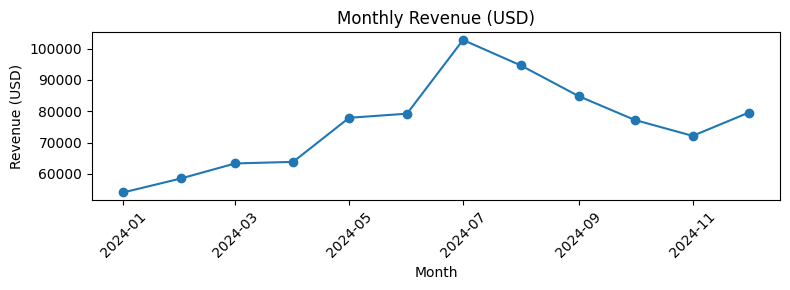

In [20]:
# Monthly revenue

import matplotlib.pyplot as plt

subs["month"] = subs["start_time"].dt.tz_localize(None).dt.to_period("M").dt.to_timestamp()

monthly_rev = (
    subs.groupby("month", as_index=False)["net_revenue_usd"]
        .sum()
        .rename(columns={"net_revenue_usd": "monthly_revenue_usd"})
)

monthly_rev.index = monthly_rev.index + 1

display(monthly_rev.head(12))

plt.figure(figsize=(8,3))
plt.plot(monthly_rev["month"], monthly_rev["monthly_revenue_usd"], marker="o")
plt.title("Monthly Revenue (USD)")
plt.xlabel("Month"); plt.ylabel("Revenue (USD)")
plt.xticks(rotation=45); plt.tight_layout(); plt.show()

,index,product_identifier,net_revenue_usd
1,4,scanner_standar_1w_1w_io,679809.427492
2,8,scanner_standard_1y,94952.206300
3,0,1wt_1w_gold_a,90449.959417
4,3,1y_gold_a,32967.898227
5,11,scanner_standard_3d_1y,4339.032207
6,1,1wt_1w_gold_b,1219.453588
7,5,scanner_standard_1m,1166.832241
8,9,scanner_standard_1y_50discount,1132.091001
9,2,1wt_1w_gold_c,952.661126
10,6,scanner_standard_1w_1w_B,720.641571


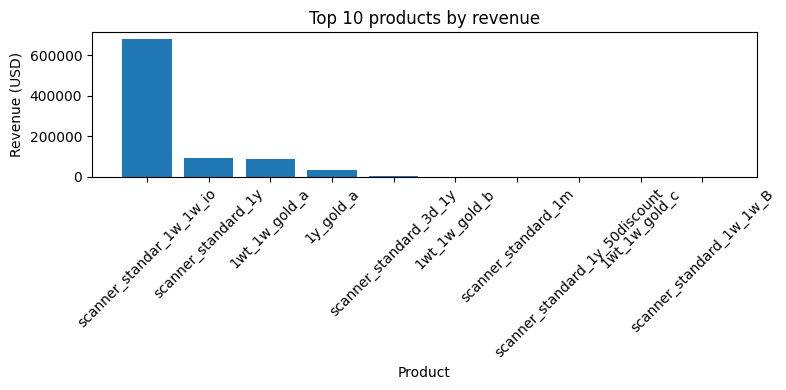

In [53]:
#Revenue per product

rev_product = (
    subs.groupby("product_identifier", as_index=False)["net_revenue_usd"]
        .sum()
        .sort_values(by="net_revenue_usd", ascending=False)
        .reset_index()  
)

rev_product.index = rev_product.index + 1

display(rev_product.head(10))


import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.bar(rev_product["product_identifier"].head(10), rev_product["net_revenue_usd"].head(10))
plt.title("Top 10 products by revenue")
plt.xlabel("Product")
plt.ylabel("Revenue (USD)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


,product_identifier,unique_users
1,scanner_standar_1w_1w_io,27925
2,1wt_1w_gold_a,6985
3,scanner_standard_1y,2269
4,1y_gold_a,723
5,1wt_1w_gold_c,263
6,1wt_1w_gold_b,228
7,scanner_standard_3d_1y,111
8,scanner_standard_1y_50discount,58
9,scanner_standard_1m,35
10,scanner_standard_1w_1w_B,32


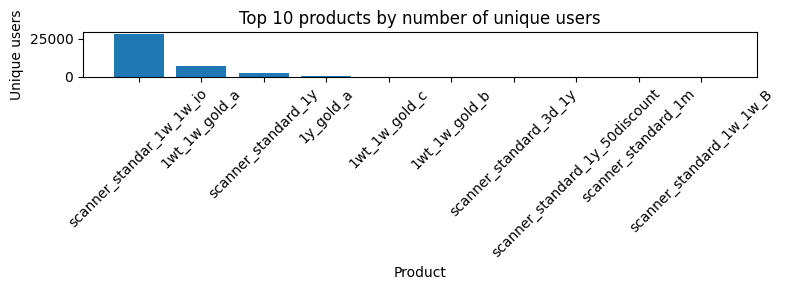

In [51]:
#Users per product

users_product = (
    subs.groupby("product_identifier")["rc_last_seen_app_user_id_alias"]
        .nunique()
        .sort_values(ascending=False)
        .reset_index(name="unique_users")
)

users_product.index = users_product.index + 1

display(users_product.head(10))


import matplotlib.pyplot as plt

plt.figure(figsize=(8,3))
plt.bar(users_product["product_identifier"].head(10), users_product["unique_users"].head(10))
plt.title("Top 10 products by number of unique users")
plt.xlabel("Product")
plt.ylabel("Unique users")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




,rc_last_seen_app_user_id_alias,net_revenue_usd
1,your-installation-id,515.4230
2,80406610-984a-11ee-9b74-b7d92423969d,450.0495
3,57426d50-9e1f-11ee-bc47-f599cd4d4bc3,450.0495
4,b13ef7f0-8e17-11ee-8699-df251c29b05d,450.0495
5,552b1c90-938b-11ee-9df2-97f8df417728,450.0495
6,4eabfe80-867e-11ee-9c9b-abd5a24d82b6,450.0495
7,1730d9a0-92d9-11ee-a805-47284ca1cdbe,450.0495
8,3895add0-9187-11ee-87cc-4b460f500ce4,441.5580
9,4aca8510-9af7-11ee-93f4-275c02dbe4cd,441.5580
10,c3776cb0-9f5e-11ee-b2a7-61cae04175d1,441.5580


C:\Users\CarlosCasermeiroArjo\AppData\Local\Temp\ipykernel_18884\3260277071.py:23: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


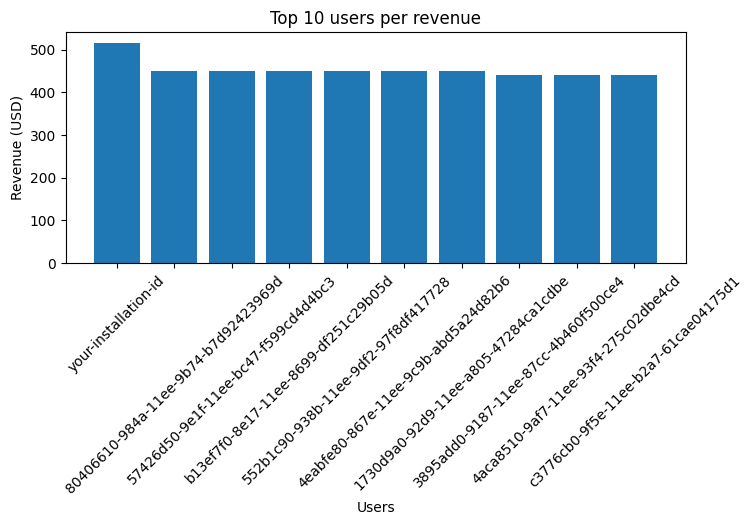

In [36]:
#Top 10 highest revenue users

top_users = (
    subs.groupby("rc_last_seen_app_user_id_alias")["net_revenue_usd"]
        .sum()
        .sort_values(ascending=False)   # ordenar de mayor a menor
        .reset_index()
)

top_users.index = top_users.index + 1

display(top_users.head(10))

import matplotlib.pyplot as plt

plt.figure(figsize=(8,3))
plt.bar(top_users["rc_last_seen_app_user_id_alias"].head(10),
        top_users["net_revenue_usd"].head(10))
plt.title("Top 10 users per revenue")
plt.xlabel("Users")
plt.ylabel("Revenue (USD)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [54]:
# COHORTE JULIO 2024 + LTV 

import pandas as pd
import numpy as np


assert 'subs' in globals(), "Primero ejecuta la celda que carga 'subscripciones_clean.csv'."


if "first_seen_time" in subs.columns:
    if subs["first_seen_time"].dtype == object:
        subs["first_seen_time"] = pd.to_datetime(subs["first_seen_time"], errors="coerce")
    install_col = "first_seen_time"
else:
    install_col = "start_time"


start_july = pd.Timestamp("2024-07-01")
end_july   = pd.Timestamp("2024-08-01")


subs["install_date"] = subs[install_col]
july_mask = (subs["install_date"] >= start_july) & (subs["install_date"] < end_july)
july_users = subs.loc[july_mask, "rc_last_seen_app_user_id_alias"].dropna().unique()
acquired_users = len(july_users)
print(f"Users acquired in July 2024: {acquired_users}")


if acquired_users > 0:
    cohort_subs = subs[subs["rc_last_seen_app_user_id_alias"].isin(july_users)].copy()
    revenue_cohort_usd = float(cohort_subs["net_revenue_usd"].sum())
    LTV_usd = revenue_cohort_usd / acquired_users
else:
    cohort_subs = subs.iloc[0:0].copy()
    revenue_cohort_usd = 0.0
    LTV_usd = np.nan
    print("No hay usuarios con instalación en julio 2024. Revisa el mes/fechas o elige otra cohorte.")

print(f"Revenue total cohorte (USD): {revenue_cohort_usd:,.2f}")
print(f" LTV (USD per user): {('NaN' if pd.isna(LTV_usd) else round(LTV_usd, 2))}")


Users acquired in July 2024: 4653
Revenue total cohorte (USD): 85,460.95
 LTV (USD per user): 18.37


In [50]:
# CPC (Cost per Click) para julio 2024


inv_july = invest[(invest["event_date"] >= start_july) & (invest["event_date"] < end_july)].copy()


total_investment_eur = inv_july["investment"].sum()
total_clicks = inv_july["clicks"].sum()


CPC = (total_investment_eur / total_clicks) if total_clicks > 0 else np.nan

print(f"Total investment for July (EUR): {total_investment_eur:,.2f}")
print(f"Total clicks for July: {total_clicks:,}")
print(f" CPC (EUR por click): {CPC:.4f}")


Total investment for July (EUR): 132,189.89
Total clicks for July: 76,297
 CPC (EUR por click): 1.7326


In [49]:
# CPI (Cost per Impression) para julio 2024


total_impressions = inv_july["impressions"].sum()


CPI = (total_investment_eur / total_impressions) if total_impressions > 0 else np.nan

print(f"Total investment for July (EUR): {total_investment_eur:,.2f}")
print(f"Total impressions for July: {total_impressions:,}")
print(f" CPI (EUR por impresión): {CPI:.8f}")


Total investment for July (EUR): 132,189.89
Total impressions for July: 531,813
 CPI (EUR por impresión): 0.24856462


In [43]:
# Revenue total de la cohorte Julio 2024


cohort_subs = subs[subs["rc_last_seen_app_user_id_alias"].isin(july_users)].copy()


revenue_cohort_usd = cohort_subs["net_revenue_usd"].sum()

print(f"Users adquired in July 2024: {acquired_users}")
print(f"Total revenue  cohorte Julio (USD): {revenue_cohort_usd:,.2f}")


Users adquired in July 2024: 4653
Total revenue  cohorte Julio (USD): 85,460.95


In [55]:
# CPA (Cost per Acquisition) para cohorte Julio 2024


CPA = (total_investment_eur / acquired_users) if acquired_users > 0 else np.nan

print(f"Total investment  in July (EUR): {total_investment_eur:,.2f}")
print(f"Users acquired in July: {acquired_users}")
print(f" CPA (EUR by acquisition): {CPA:.2f}")


Total investment  in July (EUR): 132,189.89
Users acquired in July: 4653
 CPA (EUR by acquisition): 28.41


In [57]:
# ROAS para cohorte Julio 2024


FX_USD_TO_EUR = 0.92  


revenue_cohort_eur = revenue_cohort_usd * FX_USD_TO_EUR


ROAS = (revenue_cohort_eur / total_investment_eur) if total_investment_eur > 0 else np.nan

print(f"Revenue cohorte Julio (USD): {revenue_cohort_usd:,.2f}")
print(f"Investment July (EUR): {total_investment_eur:,.2f}")
print(f"Revenue converted to EUR (FX={FX_USD_TO_EUR}): {revenue_cohort_eur:,.2f}")
print(f" ROAS (rev€ / inv€): {ROAS:.3f}   (>=1 = profitable)")


Revenue cohorte Julio (USD): 85,460.95
Investment July (EUR): 132,189.89
Revenue converted to EUR (FX=0.92): 78,624.08
 ROAS (rev€ / inv€): 0.595   (>=1 = profitable)


# Are we profitable? If not, are we on track to becoming profitable? 

At this point, the July cohort is not yet profitable .  
The total revenue generated by July users the amount amounts to **$85,460.95**, while the advertising investment was **€132,189.89**,  
which results in a **ROAS of 0.595 (<1)**. The average **LTV per user ($18.37)** is also below the **CPA (€28.41)**,  
meaning that each user currently costs more to acquire than the revenue they have generated to the company.

However, the revenue trend is increasing month by month.  
This indicates that although the campaign is not yet profitable, the July cohort is on track to approach breakeven.  
If retention and monetization continue improving at the current pace, the campaign could eventually become profitable.  




In [58]:
# LTV Prediction 

import pandas as pd
import numpy as np


assert 'subs' in globals(), "Primero ejecuta la celda donde cargas 'subscripciones_clean.csv' en la variable 'subs'."
required_cols = {"rc_last_seen_app_user_id_alias","start_time","net_revenue_usd"}
missing = required_cols - set(subs.columns)
assert not missing, f"Faltan columnas en 'subs': {missing}"


if not pd.api.types.is_datetime64_any_dtype(subs["start_time"]):
    subs["start_time"] = pd.to_datetime(subs["start_time"], errors="coerce")

try:
    subs["start_time"] = subs["start_time"].dt.tz_localize(None)
except AttributeError:
    
    pass


install_col = "first_seen_time" if "first_seen_time" in subs.columns else "start_time"
if install_col == "first_seen_time":
    if not pd.api.types.is_datetime64_any_dtype(subs["first_seen_time"]):
        subs["first_seen_time"] = pd.to_datetime(subs["first_seen_time"], errors="coerce")
    try:
        subs["first_seen_time"] = subs["first_seen_time"].dt.tz_localize(None)
    except AttributeError:
        pass

start_july = pd.Timestamp("2024-07-01")
end_july   = pd.Timestamp("2024-08-01")

subs["install_date"] = subs[install_col]
july_mask = (subs["install_date"] >= start_july) & (subs["install_date"] < end_july)
july_users = subs.loc[july_mask, "rc_last_seen_app_user_id_alias"].dropna().unique()
acquired_users = len(july_users)

print(f"Users acquired in July 2024: {acquired_users}")


cohort_subs = subs[subs["rc_last_seen_app_user_id_alias"].isin(july_users)].copy()


start_2024 = pd.Timestamp("2024-01-01")
end_2024   = pd.Timestamp("2025-01-01")

cohort_2024 = cohort_subs[(cohort_subs["start_time"] >= start_2024) & 
                          (cohort_subs["start_time"] < end_2024)].copy()


cohort_2024["month"] = cohort_2024["start_time"].dt.to_period("M").dt.to_timestamp()
monthly_2024 = (cohort_2024.groupby("month")["net_revenue_usd"]
                .sum().reset_index())
monthly_2024 = monthly_2024[monthly_2024["month"] >= start_july].copy()
monthly_2024["cum_rev_usd"] = monthly_2024["net_revenue_usd"].cumsum()


if len(monthly_2024) == 0:
    print(" La cohorte de julio no tiene revenue registrado en 2024 (jul–dic). Revisa las fechas o la cohorte.")
else:
    
    monthly_2024.index = monthly_2024.index + 1
    display(monthly_2024)


Users acquired in July 2024: 4653


,month,net_revenue_usd,cum_rev_usd
5,2024-07-01,28828.795020,28828.795020
6,2024-08-01,22890.717801,51719.512821
7,2024-09-01,12865.585366,64585.098187
8,2024-10-01,9159.642797,73744.740984
9,2024-11-01,6401.299120,80146.040103
10,2024-12-01,5252.194495,85398.234599


In [60]:
import numpy as np

X = np.arange(len(monthly_2024)).astype(float)
y = monthly_2024["cum_rev_usd"].values.astype(float)

if len(X) >= 2:
    m, b = np.polyfit(X, y, 1)
    future_steps = 6  # Ene→Jun 2025
    X_future = np.arange(len(X), len(X) + future_steps)
    y_future = m*X_future + b
    ltv_jun_2025 = float(y_future[-1])
else:
    y_future = []
    ltv_jun_2025 = float(y[-1]) if len(y) else 0.0

print(f"Projected LTV to June 2025 (July cohort): ${ltv_jun_2025:,.2f}")


Projected LTV to June 2025 (July cohort): $155,697.11


Using the July 2024 cohort and the revenue they generated during 2024, I built a monthly cumulative revenue series and applied a linear projection. 

The model predicts that the LTV of this cohort will reach approximately $155,697.11 by June 2025. 

This projection suggests that while current profitability is below breakeven, the upward revenue trend indicates potential for improved monetization in the following months.